<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pernyataan

Perusahaan Asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan machine learning. Kamu diminta untuk mengevaluasi kemungkinan itu.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru cenderung mendapatkan manfaat asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi jumlah manfaat asuransi yang mungkin diterima klien baru dengan menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Penting untuk mengembangkan algoritma transformasi data yang dapat mencegah penyalahgunaan informasi pribadi jika data tersebut jatuh ke pihak yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas model machine learning tidak menurun. Kamu tidak perlu memilih model terbaik, cukup buktikan bahwa algoritma bekerja secara akurat.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inisialisasi" data-toc-modified-id="Inisialisasi-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inisialisasi</a></span></li><li><span><a href="#Muat-Data" data-toc-modified-id="Muat-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Muat Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Tanpa-Scaling" data-toc-modified-id="Tanpa-Scaling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tanpa Scaling</a></span></li><li><span><a href="#Dengan-Scaling" data-toc-modified-id="Dengan-Scaling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dengan Scaling</a></span></li></ul></li><li><span><a href="#Buktikan-bahwa-pengaburan-data-bisa-bekerja-dengan-LR" data-toc-modified-id="Buktikan-bahwa-pengaburan-data-bisa-bekerja-dengan-LR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Buktikan bahwa pengaburan data bisa bekerja dengan LR</a></span></li><li><span><a href="#Uji-regresi-linear-dengan-pengaburan-data" data-toc-modified-id="Uji-regresi-linear-dengan-pengaburan-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uji regresi linear dengan pengaburan data</a></span></li><li><span><a href="#Apendiks-A:-Menulis-Rumus-di-Jupyter-Notebooks" data-toc-modified-id="Apendiks-A:-Menulis-Rumus-di-Jupyter-Notebooks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apendiks A: Menulis Rumus di Jupyter Notebooks</a></span></li><li><span><a href="#Apendiks-B:-Properti-Matriks" data-toc-modified-id="Apendiks-B:-Properti-Matriks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Apendiks B: Properti Matriks</a></span></li></ul></div>

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [ ]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 63.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [ ]:
df = pd.read_csv('/datasets/insurance_us.csv')

Ganti nama kolom agar kode terlihat lebih konsisten.

In [ ]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [ ]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1122,1,24.0,40500.0,1,0
2592,1,18.0,43100.0,1,0
4730,0,30.0,24400.0,1,0
2171,1,24.0,46100.0,2,0
4148,0,39.0,19300.0,0,0
327,0,29.0,47900.0,2,0
1136,0,35.0,31500.0,1,0
369,1,31.0,14500.0,0,0
3261,1,26.0,37400.0,1,0
478,1,53.0,32500.0,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Karena usia adalah bilangan bulat, maka pertama dicek terlebih dahulu apakah ada usia yang merupakan bilangan desimal. Hal ini dicek dengan menggunakan modulo 1, atau sisa pembagian 1. Jika ada umur yang tidak habis dibagi 1 maka umur tersebut adalah umur yang desimal.


In [ ]:
(df['age'] % 1 > 0).sum()

0

Ternyata nilai umur semuanya sudah sesuai dan tipe data bisa diganti menjadi int (karena sudah tidak ada desimal).


In [ ]:
df['age'] = df['age'].astype('int')

df['age'].dtypes


dtype('int64')

Tipe data dari age sudah menjadi int.

In [ ]:
# amati statistik deskriptif data. 
# Apakah sudah dengan benar?
df['insurance_benefits'].unique()

df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Dilihat dari fungsi describe,
1. Nilai umur minimal dan maksimal adalah 18 dan 65 tahun, terlihat sudah bagus.
2. Gender, karena hanya 2 yaitu laki laki dan perempuan, maka bisa dibuat menjadi 0 dan 1 untuk memudahkan pelatihan machine learning. Berarti data ini sudah aman.
3. Income, nilai minimal dan maksimalnya adalah 5300 dan 79000. Tidak ada masalah karena nilai masih logis.
4. Family Members nilai minimal  0 dan maksimal 6, hal ini juga masih masuk akal.
5. Insurance benefit pun demikian, hanya beranggotakan bilangan bulat dari 0 hingga 5.
6. Secara umum, data yang diberikan sudah sesuai dan tidak ada masalah yang begitu berarti.


## EDA

Apakah ada kelompok klien tertentu dengan mengamati sepasang plot.

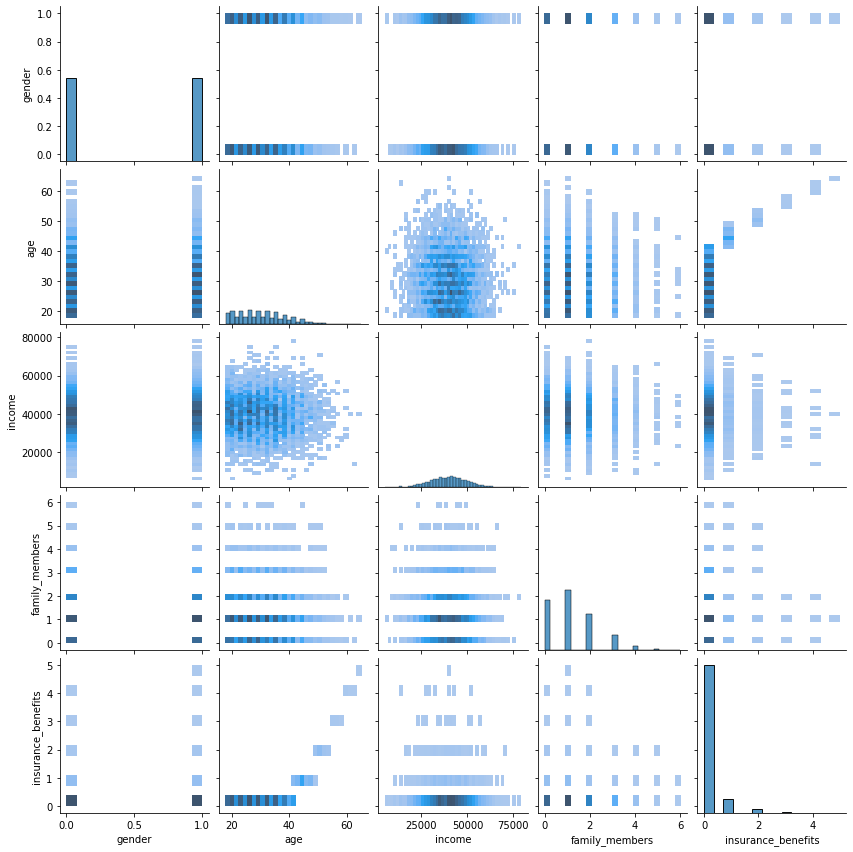

In [ ]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Mungkin itu agak sulit untuk mendeteksi kelompok (klaster) dengan jelas karena sulit untuk menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

# Tugas 1. Klien yang mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan k *neighbors* (objek) terdekat pada objek tertentu berdasarkan jarak pada objeknya.

Kamu mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euclidean
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikannya, cobalah beberapa metrik.

Ketik fungsi yang menampilkan k *neighbors* terdekat untuk objek ke-$n^{th}$ berdasarkan metrik jarak tertentu. Di soal ini, jumlah manfaat asuransi yang diterima tidak diperhitungkan.

Gunakan implementasi algoritma kNN yang tersedia di scikit-learn (periksa [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) atau gunakan milikmu sendiri.

Uji untuk empat kombinasi dari dua kasus
- Penskalaan
  - datanya tidak ada skalanya
  - mengatur skala data dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euclidean
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritma kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang didapatkan dari metrik Euclidean saat menggunakan metrik jarak Manhattan (terlepas dari penskalaannya)?

In [ ]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [ ]:
def get_knn(df, n, k, metric):
    
    """
    Tampilkan k neighbors terdekat

    :param df: pandas DataFrame digunakan untuk menemukan objek-objek yang mirip
    :param n: nomor objek yang dicari *neighbors* terdekat
    :param k: jumlah *neighbors* terdekat yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res


Mengatur skala data.

In [ ]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [ ]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
277,1.0,0.492308,0.546835,0.000000,0
3859,0.0,0.338462,0.592405,0.333333,0
3484,1.0,0.338462,0.198734,0.000000,0
4440,0.0,0.738462,0.459494,0.000000,1
3904,1.0,0.384615,0.356962,0.000000,0


Dapatkan catatan yang mirip untuk tiap kombinasi

Untuk mendapatkan catatan yang mirip, digunakan beberapa metrik untuk menentukan seberapa mirip satu data dengan yang lainnya, metrik yang akan digunakan adalah metrik euclidean dan manhattan. Karena yang dicari adalah nomor index, maka untuk pertama cari dulu dengan nomor index yang ditentukan.

Untuk format yang digunakan adalah

get_knn (data, n(data yang dicari kemiripannya), k(berapa tetangga yang dilihat), metric(metrik yang digunakan))


In [ ]:
get_knn(df, 1, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.000000
3920,0,40,38000.0,0,0,6.082763
4948,1,37,38000.0,1,0,9.055385
2528,1,36,38000.0,0,0,10.099505
3593,0,33,38000.0,0,0,13.038405


In [ ]:
get_knn(df_scaled, 1, 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0.0,0.707692,0.481013,0.166667,1,0.000000
4162,0.0,0.707692,0.477215,0.166667,1,0.003797
1863,0.0,0.707692,0.492405,0.166667,1,0.011392
4986,0.0,0.723077,0.491139,0.166667,1,0.018418
4477,0.0,0.692308,0.459494,0.166667,1,0.026453


Dilihat bahwa knn dengan data yang sudah di scaled dan yang belum discaled menghasilkan nilai yang berbeda. Untuk insurance benefits (yaitu target yang akan dicari) pada data yang belum dilakukan scaling memiliki insurance benefits yang berbeda beda, mungkin untuk kasus ini saya sedikit beruntung untuk mendapatkan langsung bahwa insurance benefits pada data scaling dengan yang belum discaling berbeda.

Untuk memastikan secara tepat maka lebih baik menggunakan index yang memang insurance benefits nya bukan 0.


In [ ]:
get_knn(df, df.loc[df['insurance_benefits']==4].index[0], 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1568,1,59,32100.0,0,4,0.000000
4662,1,47,32100.0,1,1,12.041595
2761,1,45,32100.0,3,1,14.317821
905,1,44,32100.0,1,1,15.033296
3497,0,42,32100.0,0,1,17.029386


In [ ]:
get_knn(df_scaled, df.loc[df['insurance_benefits']==4].index[0], 5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1568,1.0,0.907692,0.406329,0.0,4,0.000000
3674,1.0,0.907692,0.374684,0.0,4,0.031646
1215,1.0,0.892308,0.335443,0.0,3,0.072536
339,1.0,0.830769,0.448101,0.0,2,0.087533
117,1.0,0.800000,0.405063,0.0,2,0.107700


Sangat jelas bahwa data yang belum discaling mendapatkan insurance benefits yang berbeda, hal ini menunjukkan bahwa data harus di scaling terlebih dahulu karena fitur yang digunakan memiliki nilai yang jomplang antara 1 kolom dengan kolom yang lainnnya, seperti gender yang hanya 0 dan 1, age yang merupakan nilai puluhan, dan income yang memiliki nilai puluhan ribu.

Ya meskipun pada data yang sudah discaling mendapatkan nilai yang berbeda juga, tetapi setidaknya nilai insurance benefits yang merupakan target tidak jomplang dari 4 ke 1, tapi dari 4 ke 3 dulu lalu ke 2.

**Namun bagaimana dengan metrik manhattan?**


In [ ]:
get_knn(df, df.loc[df['insurance_benefits']==4].index[0], 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1568,1,59,32100.0,0,4,0.0
4662,1,47,32100.0,1,1,13.0
905,1,44,32100.0,1,1,16.0
2761,1,45,32100.0,3,1,17.0
3497,0,42,32100.0,0,1,18.0


In [ ]:
get_knn(df_scaled, df.loc[df['insurance_benefits']==4].index[0], 5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1568,1.0,0.907692,0.406329,0.0,4,0.000000
3674,1.0,0.907692,0.374684,0.0,4,0.031646
1215,1.0,0.892308,0.335443,0.0,3,0.086271
117,1.0,0.800000,0.405063,0.0,2,0.108958
339,1.0,0.830769,0.448101,0.0,2,0.118695


Hasilnya tidak berbeda jauh dengan metric dari euclidean.


**Apakah data yang tidak berskala memengaruhi algoritma kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Sangat berpengaruh, data yang tidak berskala, seperti yang sudah dijelaskan diatas, membuat bingung dari KNN, karena KNN akan melihat bahwa income (nilai kolom yang memiliki nilai yang besar), adalah bagian yang paling utama dalam algoritma ini, sehingga nilai umur yang padahal memiliki nilai yang sangat penting menjadi tidak berarti dihadapan income.

Dengan dilakukan scaling, nilai income akan menjadi nilai yang bisa digapai oleh nilai age, dan nilai dari fitur fitur lainnya sehingga tidak akan membuat fitur lain selain income "lemah".

**Seberapa mirip hasil yang didapatkan dari metrik Euclidean saat menggunakan metrik jarak Manhattan (terlepas dari penskalaannya)?** 

Hasilnya sangat mirip dari yang tanpa skala dan yang telah menggunakan skala. Hal ini karena ya memang algoritma yang dijalankan hampir mirip dengan euclidean, sama sama mencari jarak antar data. Ketika sudah dilakukan scaling, maka jarak data akan mengecil dibanding sebelum dilakukan scaling.


# Tugas 2. Apakah klien kemungkinan menerima manfaat asuransi?

Dalam konteks machine learning, tugas ini sama seperti tugas klasifikasi biner.

Dengan target `insurance_benefits` yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 untuk data asli dan data yang diskalakan. Menarik untuk lihat bagaimana k dapat memengaruhi metrik evaluasi dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritma klasifikasi kNN yang tersedia di scikit-learn (periksa [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau milikmu sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Uji model dengan empat nilai probabilitas: 0, probabilitas membayar manfaat asuransi apa pun; 0,5; 1.

Probabilitas membayar manfaat asuransi dapat didefinisikan sebagai

$$
P\{\text{manfaat asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima manfaat asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi **training** dan **test set**.

In [ ]:
# Hitung tagetnya

df['insurance_benefits_received'] = df['insurance_benefits_received'] = (df['insurance_benefits']>0).astype('int')

Dengan memanfaatkan kondisi boolean, true dan false akan otomatis dirubah menjadi 0 dan 1 ketika dijadikan int

In [ ]:
df['insurance_benefits_received']

# < kode program di sini >

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: insurance_benefits_received, Length: 5000, dtype: int64

In [ ]:
(df['insurance_benefits_received'].value_counts()/df.shape[0])*100

0    88.72
1    11.28
Name: insurance_benefits_received, dtype: float64

Dilihat bahwa yang mendapatkan insurance sangat lebih sedikit dengan yang tidak mendapatkan dengan 88% dan 11%.


In [ ]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika kamu memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [ ]:
# mengumpulkan output pada model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [ ]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df)) 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilitasnya: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilitasnya: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilitasnya: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



Ini merupakan model dummy, terlihat bahwa nilai F1 nya dibawah 0.20

In [ ]:
features = np.array(df[['age', 'gender', 'income', 'family_members']])
target = np.array(df['insurance_benefits_received'])
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size = 0.7, random_state=1)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(features_train, target_train)
test_pred = model.predict(features_test)
eval_classifier(target_test, test_pred)  

F1: 0.32
Confusion Matrix
[[0.88466667 0.018     ]
 [0.07533333 0.022     ]]


Model sudah jalan, selanjutnya adalah melakukan membuat fungsi dan looping  untuk mendapatkan nilai F1 terbaik dengan melakukan perbandingan antara data scaling dan data raw.


In [ ]:
def neighbors_model(data):
    features = np.array(data[['age', 'gender', 'income', 'family_members']])
    target = np.array(df['insurance_benefits_received'])
    features_train, features_test, target_train, target_test = train_test_split(features, target, train_size = 0.7, random_state=1)
    for i in range(1,10):
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
        model.fit(features_train, target_train)
        test_pred = model.predict(features_test)
        print(f'Jumlah neighbor  = {i}')
        eval_classifier(target_test, test_pred)
        print()

In [ ]:
neighbors_model(df)

Jumlah neighbor  = 1
F1: 0.55
Confusion Matrix
[[0.876      0.02666667]
 [0.05       0.04733333]]

Jumlah neighbor  = 2
F1: 0.31
Confusion Matrix
[[0.89866667 0.004     ]
 [0.07866667 0.01866667]]

Jumlah neighbor  = 3
F1: 0.32
Confusion Matrix
[[0.88466667 0.018     ]
 [0.07533333 0.022     ]]

Jumlah neighbor  = 4
F1: 0.18
Confusion Matrix
[[0.90133333 0.00133333]
 [0.08733333 0.01      ]]

Jumlah neighbor  = 5
F1: 0.21
Confusion Matrix
[[0.89933333 0.00333333]
 [0.08533333 0.012     ]]

Jumlah neighbor  = 6
F1: 0.10
Confusion Matrix
[[9.02000000e-01 6.66666667e-04]
 [9.20000000e-02 5.33333333e-03]]

Jumlah neighbor  = 7
F1: 0.11
Confusion Matrix
[[0.90133333 0.00133333]
 [0.09133333 0.006     ]]

Jumlah neighbor  = 8
F1: 0.08
Confusion Matrix
[[0.90266667 0.        ]
 [0.09333333 0.004     ]]

Jumlah neighbor  = 9
F1: 0.09
Confusion Matrix
[[9.02000000e-01 6.66666667e-04]
 [9.26666667e-02 4.66666667e-03]]



In [ ]:
neighbors_model(df_scaled)

Jumlah neighbor  = 1
F1: 0.96
Confusion Matrix
[[0.898      0.00466667]
 [0.004      0.09333333]]

Jumlah neighbor  = 2
F1: 0.91
Confusion Matrix
[[0.90133333 0.00133333]
 [0.01466667 0.08266667]]

Jumlah neighbor  = 3
F1: 0.91
Confusion Matrix
[[0.896      0.00666667]
 [0.01066667 0.08666667]]

Jumlah neighbor  = 4
F1: 0.90
Confusion Matrix
[[0.89866667 0.004     ]
 [0.014      0.08333333]]

Jumlah neighbor  = 5
F1: 0.93
Confusion Matrix
[[0.894      0.00866667]
 [0.006      0.09133333]]

Jumlah neighbor  = 6
F1: 0.91
Confusion Matrix
[[0.90066667 0.002     ]
 [0.014      0.08333333]]

Jumlah neighbor  = 7
F1: 0.94
Confusion Matrix
[[0.89866667 0.004     ]
 [0.00733333 0.09      ]]

Jumlah neighbor  = 8
F1: 0.93
Confusion Matrix
[[9.02000000e-01 6.66666667e-04]
 [1.26666667e-02 8.46666667e-02]]

Jumlah neighbor  = 9
F1: 0.94
Confusion Matrix
[[0.90133333 0.00133333]
 [0.00933333 0.088     ]]



Dilihat dari jumlah neighbors yang ada, nilai F1 terbaik jatuh kepada nilai neighbors = 1 baik pada data yang sudah di scaling maupun yang belum discaling.


# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, coba evaluasi apa RMSE untuk model regresi linearnya.

Buat implementasi LR. Ingatlah bagaimana solusi tugas regresi linear dirumuskan dalam istilah LA. Periksa RMSE untuk data asli maupun data yang ada skalanya. Bisakah melihat perbedaan RMSE di kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari kesatuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Ada solusi analitis untuk hal di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi **training** dan **validation set** dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [ ]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # tambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # tambahkan satuan
        X2 = np.append(np.ones([len(X),1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [ ]:
def eval_regressor(y_true, y_pred):
    
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = np.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')   

### Tanpa Scaling

In [ ]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


Dengan menggunakan data yang belum discaling, terlihat bahwa nilai RMSE adalah 0.34 dan R2 adalah 0.66


### Dengan Scaling

In [ ]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Ternyata dengan menggunakan data yang sudah discaling, nilai yang dihasilkan tidak terlalu  berubah, namun ada sedikit perbedaan dari weight yang digunakan. Ini berarti memang benar terkait Linear Regression yang tidak terlalu butuh dengan data yang di scaling.


# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik $P$. 

$$
X' = X \times P
$$

Coba lakukan hal itu dan periksa hasil nilai-nilai fiturnya setelah ditransformasikan. Properti invertible penting di sini, jadi pastikan $P$ dapat dibalik.

Mungkin kamu ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [ ]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [ ]:
X = df_pn.to_numpy()

Membuat matriks acak $P$.

In [ ]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Periksa apakah matriks $P$ bisa dibalik

Untuk melihat bahwa matriks bisa di inverse, kita cek terlebih dahulu apakah determinan dari matriks adalah 0 atau tidak, karena matriks dengan determinan sama dengan 0 tidak bisa di inverse.


In [ ]:
np.linalg.det(P)

0.24339135998015463

Determinan matriks P tidak sama dengan 0, sehingga matriks bisa di inverse.


Bisakah kamu menebak usia klien atau pendapatan setelah melakukan transformasi?

In [ ]:
Xs = X@P

dftrans = pd.DataFrame(Xs, columns=df_pn.columns)
dftrans2 = pd.concat([df, dftrans], axis=1, keys=['original', 'transformed'])
dftrans2

original                                                 \
       gender age   income family_members insurance_benefits   
0           1  41  49600.0              1                  0   
1           0  46  38000.0              1                  1   
2           0  29  21000.0              0                  0   
3           0  21  41700.0              2                  0   
4           1  28  26100.0              0                  0   
...       ...  ..      ...            ...                ...   
4995        0  28  35700.0              2                  0   
4996        0  34  52400.0              1                  0   
4997        0  20  33900.0              2                  0   
4998        1  22  32700.0              3                  0   
4999        1  28  40600.0              1                  0   

                                  transformed                              \
     insurance_benefits_received       gender           age        income   
0                              0  6359.715273  22380.404676  18424.090742   
1                              1  4873.294065  17160.367030  14125.780761   
2                              0  2693.117429   9486.397744   7808.831560   
3                              0  5345.603937  18803.227203  15479.148373   
4                              0  3347.176735  11782.829283   9699.998942   
...                          ...          ...           ...           ...   
4995                           0  4577.581382  16107.740932  13259.688205   
4996                           0  6717.000247  23634.217067  19456.138634   
4997                           0  4346.223425  15289.241265  12586.162644   
4998                           0  4194.093242  14751.991024  12144.029306   
4999                           0  5205.468274  18314.248144  15077.013708   

                     
     family_members  
0      46000.696690  
1      35253.455773  
2      19484.860631  
3      38663.061863  
4      24211.273378  
...             ...  
4995   33107.974380  
4996   48589.438841  
4997   31433.508886  
4998   30323.887634  
4999   37649.592955  

[5000 rows x 10 columns]

Untuk menebak mungkin tidak karena data sudah terlalu random, tetapi jika melalui perhitungan mungkin bisa, tetapi harus didapatkan dulu matriks P nya dan menggunakan sifat Matriks.


Bisakah kamu memulihkan data asli dari $X'$ jika sudah tahu $P$-nya? Coba periksa perhitungan dengan memindahkan $P$ dari sisi kanan atas rumus, ke bagian kiri. Aturan perkalian matriks sangat berguna di sini.

In [ ]:
Pinv = np.linalg.inv(P)

Xori = Xs @ Pinv 

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dikembalikan ke semula

In [ ]:
dfo = pd.DataFrame(Xori, columns=df_pn.columns)
dftrans3 = pd.concat([df_pn,dfo, dftrans], axis=1, keys=['original', 'reversed', 'transformed'])
dftrans3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (original, gender)             5000 non-null   int64  
 1   (original, age)                5000 non-null   int64  
 2   (original, income)             5000 non-null   float64
 3   (original, family_members)     5000 non-null   int64  
 4   (reversed, gender)             5000 non-null   float64
 5   (reversed, age)                5000 non-null   float64
 6   (reversed, income)             5000 non-null   float64
 7   (reversed, family_members)     5000 non-null   float64
 8   (transformed, gender)          5000 non-null   float64
 9   (transformed, age)             5000 non-null   float64
 10  (transformed, income)          5000 non-null   float64
 11  (transformed, family_members)  5000 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 468.9 KB


In [ ]:
dftrans3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (original, gender)             5000 non-null   int64  
 1   (original, age)                5000 non-null   int64  
 2   (original, income)             5000 non-null   float64
 3   (original, family_members)     5000 non-null   int64  
 4   (reversed, gender)             5000 non-null   float64
 5   (reversed, age)                5000 non-null   float64
 6   (reversed, income)             5000 non-null   float64
 7   (reversed, family_members)     5000 non-null   float64
 8   (transformed, gender)          5000 non-null   float64
 9   (transformed, age)             5000 non-null   float64
 10  (transformed, income)          5000 non-null   float64
 11  (transformed, family_members)  5000 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 468.9 KB


Untuk mempermudah, maka hilangkan nilai dibelakang desimal, dengan mengganti tipe data menjadi int.

In [ ]:
dftrans3.astype('int')

original                           reversed                            \
       gender age income family_members   gender age income family_members   
0           1  41  49600              1        0  40  49600              1   
1           0  46  38000              1        0  46  37999              1   
2           0  29  21000              0        0  28  21000              0   
3           0  21  41700              2        0  20  41700              2   
4           1  28  26100              0        0  27  26100              0   
...       ...  ..    ...            ...      ...  ..    ...            ...   
4995        0  28  35700              2        0  27  35699              1   
4996        0  34  52400              1        0  33  52400              0   
4997        0  20  33900              2        0  19  33900              1   
4998        1  22  32700              3        0  21  32700              3   
4999        1  28  40600              1        0  27  40599              1   

     transformed                               
          gender    age income family_members  
0           6359  22380  18424          46000  
1           4873  17160  14125          35253  
2           2693   9486   7808          19484  
3           5345  18803  15479          38663  
4           3347  11782   9699          24211  
...          ...    ...    ...            ...  
4995        4577  16107  13259          33107  
4996        6717  23634  19456          48589  
4997        4346  15289  12586          31433  
4998        4194  14751  12144          30323  
4999        5205  18314  15077          37649  

[5000 rows x 12 columns]

Mungkin untuk nilai income terlihat sudah sangat dekat menjadi nilai aslinya, namun nilai nilai lain jauh berbeda dengan nilai originalnya.


Mungkin kamu bisa melihat ada beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

Hal ini karena adanya pengalian dan pembagian lalu terjadi pembulatan. Ini bisa terjadi juga pada operasi matematika yang menyebabkan suatu nilai menjadi desimal,contoh kecilnya ketika 1 dibagi 3 adalah 0.3333333, namun ketika dikali 3 lagi nilainya malah menjadi 0.99999 bukan menjadi 1, hal ini juga terjadi pada operasi matriks diatas.


##  Buktikan bahwa pengaburan data bisa bekerja dengan LR

Tugas regresi telah diselesaikan dengan regresi linear di sini. Tugas selanjutnya adalah untuk membuktikan analytically bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear, yaitu nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah kamu yakin? Kamu harus membuktikannya!

Jadi, data dikaburkan dan ada $X \times P$ sekarang $X$. Akibatnya, ada bobot lain $w_P$ 
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika menyederhanakan rumus untuk $w_P$ di atas? 

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya kualitas regresi linier jika mengukurnya dengan RMSE?

Periksa properti apendiks B matriks di akhir *notebook*. Ada beberapa rumus di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

Bisa

**Bukti analitis**

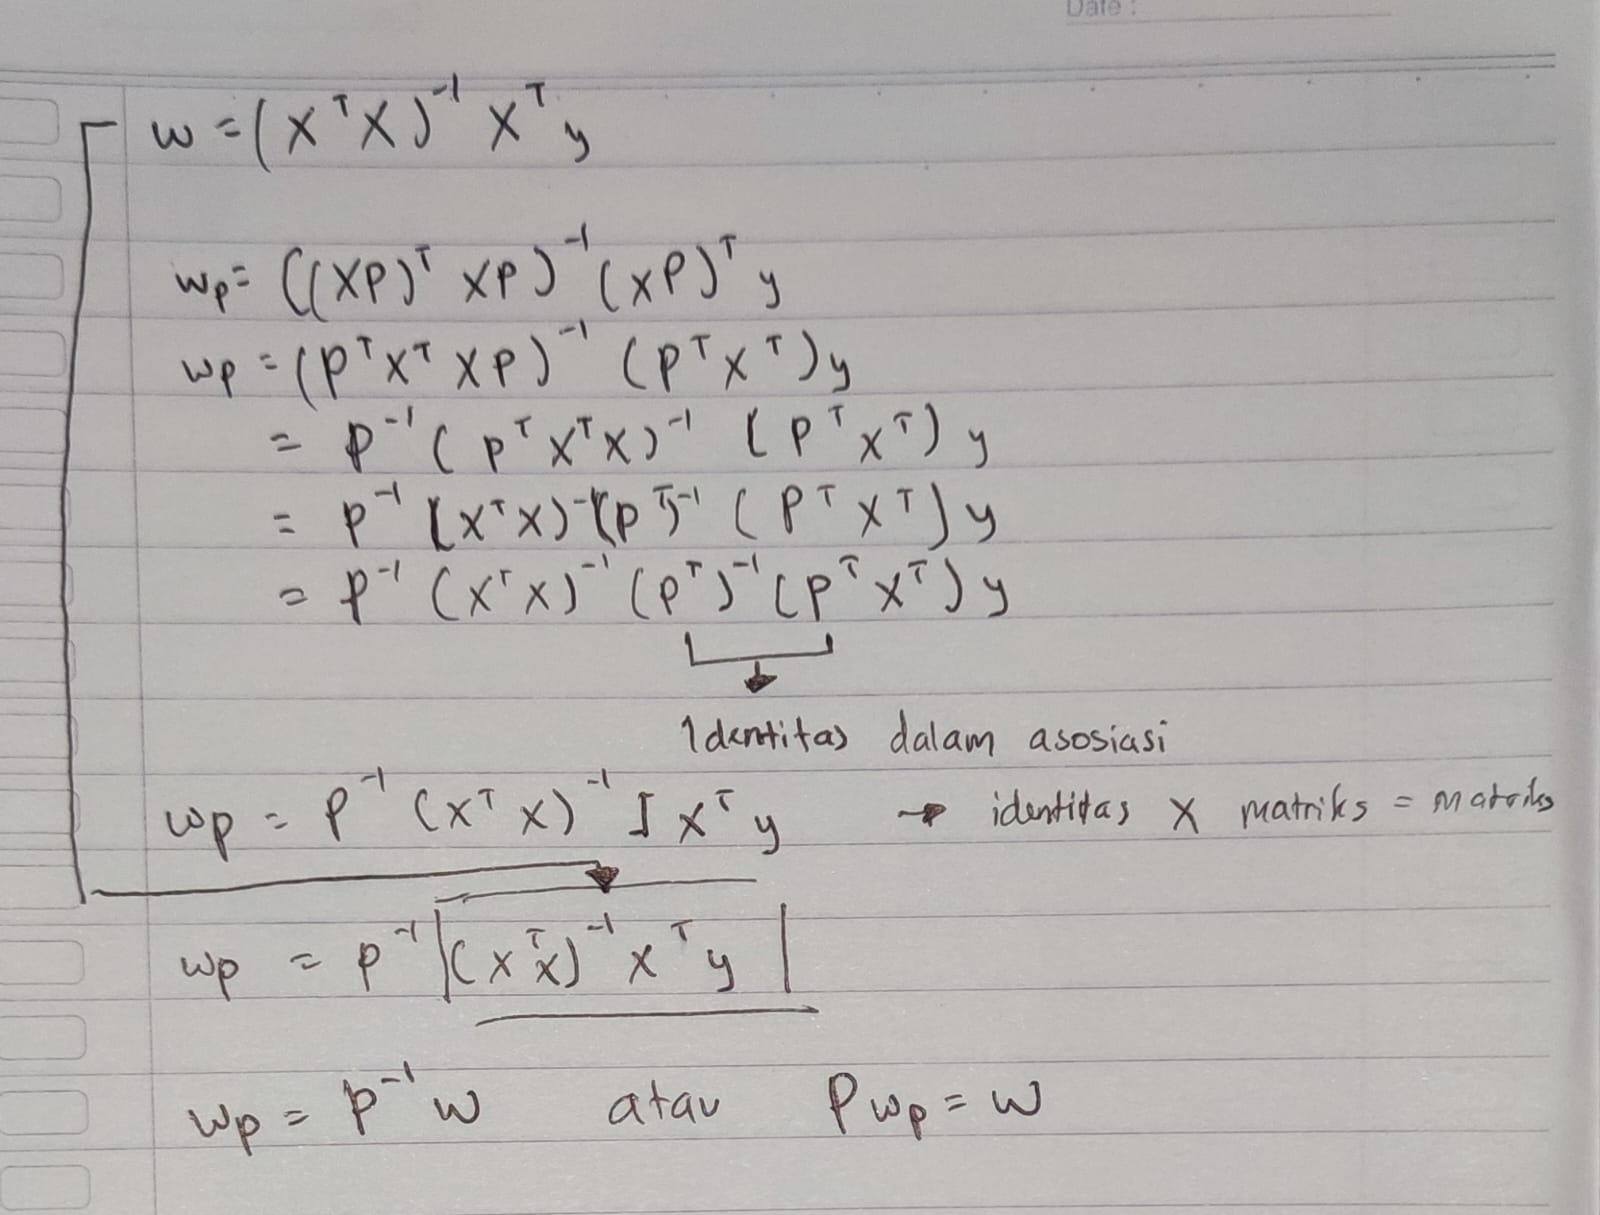

Mohon maaf apabila kurang rapih hehe, untuk penulisan rumus dalam notebook ada dibawah.

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y\\
    = [P^T X^T X P]^{-1} (XP)^T y \\
    = [(P^T X^T X) P]^{-1} (XP)^T y \\
    = P^{-1} [P^T X^T X]^{-1} (XP)^T y \\
    = P^{-1} [X^T X]^{-1} [P^T]^{-1} (XP)^T y \\
    = P^{-1} [X^T X]^{-1} [P^T]^{-1} P^T X^T y \\
    = P^{-1} [X^T X]^{-1} I X^T y \\
    = P^{-1} [X^T X]^{-1} X^T y \\    
    = P^{-1}   \longrightarrow[X^T X]^{-1} X^T y\longleftarrow
$$

Yang ditunjuk di formula paling bawah sama dengan nilai $w$. Sehingga

$w_p = P^{-1}w$ atau $Pw_p = w$ 


Jadi nilai $w_p$ akan memprediksi nilai matriks inverse dari P dikalikan dengan $w$

## Uji regresi linear dengan pengaburan data

Buktikan bila regresi linier dapat bekerja secara komputasional apabila diterapkan transformasi pengaburan data.

Buat prosedur atau kelas yang menjalankan regresi linier dengan pengaburan data. Kamu bisa menggunakan regresi linier yang tersedia di scikit-learn atau milikmu sendiri.

Jalankan regresi linier untuk data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah bisa dibalik. Jika tidak, ulangi langkah pertama sampai mendapatkan matriks yang bisa dibalik.
- <! komentar di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [ ]:
features = df[['age', 'gender', 'income', 'family_members']].to_numpy()
target = df['insurance_benefits'].to_numpy()

features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
model = MyLinearRegression()

model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

eval_regressor(target_test, pred_test)

RMSE: 0.34
R2: 0.66


Untuk membuat matriks acak, perlu diperhatikan bahwa matriks acak ini harus memiliki determinan yang tidak sama dengan 0. Karena matriks dengan determinan sama dengan 0 tidak akan bisa di inverse. Dengan catatan nilai kondisi awal adalah nilai yang dekat dengan 0 tapi tidak dengan 0, 0.0001 mungkin cukup untuk dijadikan kondisi awal.

In [ ]:
det = 0
thres = 1e-4

while det < thres:
    rng = np.random.default_rng()
    P = rng.random(size=(features_train.shape[1], features_train.shape[1]))
    det = np.linalg.det(P)
    
print(f'Didapatkan matriks dengan determinan {det:.2f}')

features_abur_train = features_train @ P
features_abur_test = features_test @ P

Didapatkan matriks dengan determinan 0.11


In [ ]:
model_abur = MyLinearRegression()

model_abur.fit(features_abur_train, target_train)

pred_abur_test = model_abur.predict(features_abur_test)

eval_regressor(target_test, pred_abur_test)

RMSE: 0.34
R2: 0.66


Terlihat bahwa nilai RMSE dan R2 nya sama dengan nilai RMSE dan R2 dengan model dengan nilai yang belum diaburkan.

# Kesimpulan

1. Dalam dataset yang memiliki nilai kolom dengan rentang yang jauh atau memiliki satuan yang berbeda misalnya dalam kasus pada projek ini adalah nilai income dan age, maka diperlukan scaling untuk menerapkan algoritma KNN, hal ini dikarenakan jika nilai satu kolom sangat jomplang dengan nilai lainnya, maka nilai yang rendah bisa saja dianggap tidak terlalu penting oleh KNN.
2. Dalam regresi linear, scaling tidak terlalu diperlukan karena pengerjaan algoritma regresi linear bukan berdasarkan metrik jarak, namun dengan operasi perkalian matriks.
3. Pengaburan data bisa bermanfaat dalam melindungi privasi data yang penting. Namun untuk mendapatkan nilai original sebelum data diaburkan perlu metode yang cukup rumit karena ketika ada pembagian yang menyebabkan bilangan pecahan yang tidak bulat, maka ketika dikembalikan, nilai tersebut memiliki sisa, nilai bisa naik ataupun turun.